In [32]:
import pandas as pd
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [33]:
X = df.iloc[ : , :-1]
y = df.iloc[: , 4:]

In [34]:
states = pd.get_dummies(X['State'],drop_first=True)
X = X.drop('State',axis=1)


In [35]:
X = pd.concat([X,states],axis =1)

In [37]:
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [39]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [40]:
y_pred = regressor.predict(X_test)

In [42]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.9347068473282423

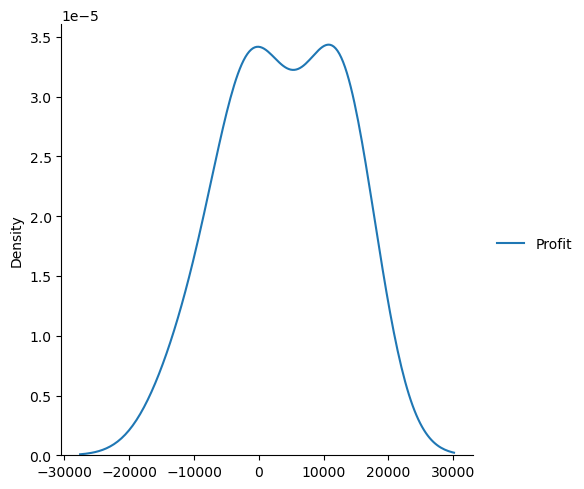

In [43]:
import seaborn as sns
sns.displot(y_test-y_pred,kind='kde')